<img src="https://www.hs-rm.de/fileadmin/_processed_/6/9/csm_Design-Informatik-Medien_Desktop_d4d7150696.jpg" width="100%">
 
# Pytorch 

In this notebook, we will get to know **PyTorch**, which is - together with Google's tensorflow - the most common deep learning framework. Pytorch allows you to easily design neural networks with flexible topologies, activation functions and losses, and train them using various batching strategies and optimizers. Like all deep learning libraries, PyTorch performs backpropagation automatically, i.e. you don't have to worry about computing gradients by yourself. 

This notebook showcases a small neural network to solve a simple 2D toy problem.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/pytorch_3.png" width="100%">



## 0. Preparation
We import the PyTorch library...

In [1]:
import torch
torch.manual_seed(0) # for reproducability

print(torch.__version__)               # tested with 1.9.1  

1.9.1+cpu


## 1. Tensors
The core objects of PyTorch are **tensors**, which are basically n-dimensional arrays similar to **numpy arrays**: 1-dimensional tensors are vectors, 2-dimensional tensors are matrices, etc..

Let's start with a few basic Tensor operations...

### 1a. Defining tensors
We start by defining a few tensors...  

In [ ]:
x = torch.ones(10)
x = torch.randn(2,3)
x = torch.tensor([[1,2,3],[4,5,6]])
print(x.dtype, x.shape)                  # tensors have datatypes and shapes (like np arrays)

### 1b. Casting
We can cast between torch tensors and numpy arrays...


In [3]:
xnumpy = x.numpy()
print(xnumpy)
print(x)

x = torch.from_numpy(xnumpy)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


### 1c. GPU Computing
Also, each torch tensor can either reside on the CPU or GPU. We can send a tensor to the GPU to do computations there (which is usually a lot faster). Later, we may be doing that with larger models and data...

In [4]:
print(torch.cuda.is_available())

if torch.cuda.is_available():             # checks whether there is GPU support
    tgpu = t.to(torch.device("cuda"))        

False


### 1d. Reshaping
We can reshape tensors, or squeeze in additional dimensions.

In [5]:
x = torch.tensor([[1,2,3],[4,5,6]])
print(x.size())                    
x = x.unsqueeze(0)
print(x.size())                     
x = x.unsqueeze(2)
print(x.size())                    
x = x.reshape((3,1,2,1))
print(x.size())                   
x = x.squeeze(-1)
print(x.size())                   

torch.Size([2, 3])
torch.Size([1, 2, 3])
torch.Size([1, 2, 1, 3])
torch.Size([3, 1, 2, 1])
torch.Size([3, 1, 2])


## 3. Defining a Neural Network

PyTorch allows us to define **entire neural networks** consisting of layers, with weight matrices and bias vectors. We can train these networks easily, and apply them to new input data.

<img src="https://www.cs.hs-rm.de/~ulges/teaching/imgs/mlp_mini.png" width="30%">

We define a simple neural network *(more precisely, an MLP with 2 input units, $H$ hidden units and two output units)*.

The implementation introduces two other PyTorch types:
* **Module**    : This class represents a neural network. Whenever you write your own network, you subclass Module.
* **Parameter** : Parameters are the parts of the model that are *learned*. You can think of them as wrappers around tensors, leading to the tensors to be updated during training. Classical examples of such parameters are weight matrices and biases in an MLP.


In [6]:
import torch.nn as nn

class MLP(nn.Module):
    
    def __init__(self, H):
        '''H is the number of hidden units.'''
        super(MLP, self).__init__()

        self.W2 = nn.Parameter(torch.randn((2, H), dtype=torch.float))    # initialize ~ N(0,1)
        self.W3 = nn.Parameter(torch.randn((H, 2), dtype=torch.float))
        self.b2 = nn.Parameter(torch.randn(H))
        self.b3 = nn.Parameter(torch.randn(2))

    def forward(self, x):
        
        # Layer 2
        x = torch.mm(x, self.W2) + self.b2
        x = torch.sigmoid(x)
        
        # Layer 3
        x = torch.mm(x, self.W3) + self.b3
        x = torch.sigmoid(x)
        
        return x
        

### 3a. Inspecting the Network
We print the network, particularly its parameters, i.e. the internal weights and biases...

In [7]:
mlp = MLP(10)

for param in mlp.parameters():
    print(param)

Parameter containing:
tensor([[-0.0885,  0.5239, -0.6659,  0.8504, -0.6136,  0.0316, -0.4927,  0.2484,
          0.4397,  0.1124],
        [ 0.6408,  0.4412, -0.1023,  0.7924, -0.2897,  0.0525,  0.5229,  2.3022,
         -1.4689, -1.5867]], requires_grad=True)
Parameter containing:
tensor([[-0.6731,  0.8728],
        [ 1.0554,  0.1778],
        [-1.4782,  2.5672],
        [-0.4731,  0.3356],
        [ 1.5091,  2.0820],
        [ 1.7067,  2.3804],
        [-1.0670,  1.1149],
        [-0.1407,  0.8058],
        [ 0.3276, -0.7607],
        [-1.5991,  0.0185]], requires_grad=True)
Parameter containing:
tensor([-0.0075, -0.9145, -1.0886, -0.2666,  0.1894, -0.2190,  2.0576, -0.0354,
         0.0627, -0.7663], requires_grad=True)
Parameter containing:
tensor([1.0993, 2.7565], requires_grad=True)


### 3b. Forward Pass
We define two input samples, stack them to a small "batch" **x**, and run them through the network.

In [8]:
x = torch.tensor([[0.5, 0.2], 
                  [0.1, 0.9]])
y = mlp(x) # calls mlp.forward(y)
print(y)


tensor([[0.6810, 0.9992],
        [0.6770, 0.9996]], grad_fn=<SigmoidBackward>)


## 3c. Defining the same Network, but with even simpler Code
We can even simplify the network definition a bit further. This is because PyTorch offers convenience objects, such as **nn.linear**, which represents a simple fully-connected layer by wrapping the matrix multiplication + bias addition (A * x + b) into a single object. You will see the same in many other places: Most building blocks of neural networks are already pre-implemented in PyTorch.

In [9]:
class MLP2(nn.Module):
    
    def __init__(self, H):
        super(MLP2, self).__init__()

        self.L2 = nn.Linear(2,H)    # weights are in self.L2.weight, biases in self.L2.bias 
        self.L3 = nn.Linear(H,2)

    def forward(self, x):
        
        # first layer
        x = self.L2(x)
        # x = torch.sigmoid(x)
        
        # second layer
        x = self.L3(x)
        # x = torch.sigmoid(x)
        
        return x

    
mlp2 = MLP2(H = 10)

print(mlp2)
print(mlp2.L2.weight)

MLP2(
  (L2): Linear(in_features=2, out_features=10, bias=True)
  (L3): Linear(in_features=10, out_features=2, bias=True)
)
Parameter containing:
tensor([[-0.0390,  0.1062],
        [-0.2896,  0.4196],
        [-0.4303,  0.6416],
        [ 0.4846, -0.5963],
        [-0.1760,  0.0319],
        [ 0.1032,  0.1677],
        [ 0.2775,  0.0424],
        [-0.3450,  0.3346],
        [-0.6783, -0.4191],
        [-0.1770, -0.3444]], requires_grad=True)


## 3. Gradient Descent and Backpropagation

Next, we try to implement a single training step, consisting of a forward pass and a backward pass... 

### 3a. Loss Function
To train the neural network, we require a loss function E. We define the mean squared error (MSE) loss *(using PyTorch's implementation)*. 

In [10]:
mlp = MLP(H=10)

# The loss function
loss_function = nn.MSELoss()

### 3b. Forward Pass
We implement the forward pass: We define a bit of input data, i.e. a *batch* of two samples with targets.

We feed the two samples through the network, and obtain a loss value.

In [11]:
# We define a BATCH of training samples!
# with input x  and target value t.
x = torch.tensor([[0.5, 0.2], 
                  [0.1, 0.9]])
t = torch.tensor([[0, 1], 
                  [1, 0]], dtype=torch.float32)

# We forward the sample through the network
# and compute the output y
y = mlp(x)


# We compute the loss between the network's output y
# and the desired output t.
loss = loss_function(y, t)
print('LOSS =', loss.item())

LOSS = 0.3700633645057678


### 3b. Backward Pass
We now do the backward pass, which results in gradients for all network parameters. 

**This is *the* key step for learning! Please do note that we do not have to calculate the gradients by hand, i.e. PyTorch computes the gradients automatically. This is great!!!**

In [12]:
# We now compute the gradients...
loss.backward()

# ... and have a look at some of them:
print(mlp.W2.grad)
print(mlp.b3.grad)

tensor([[ 0.0015, -0.0021,  0.0035,  0.0087, -0.0041, -0.0082,  0.0003,  0.0105,
          0.0021, -0.0003],
        [ 0.0050,  0.0070, -0.0004, -0.0007, -0.0101,  0.0100, -0.0006, -0.0012,
          0.0018, -0.0024]])
tensor([0.0492, 0.0244])


## 4. Defining a Toy Problem
We define a simple learning task: The neural network is given random vectors from $[-1,1] \times [-1,1]$ and is supposed to classify 'inside' samples (within a circle) from 'outside' samples. We define...
* the function *dataset_circle()*, which generates a training set of random 2D input vectors $X$ and corresponding one-hot encoded 2D labels $t$.
* the function *plot_problem()*, with which we can plot the training set (and later, the network's output).


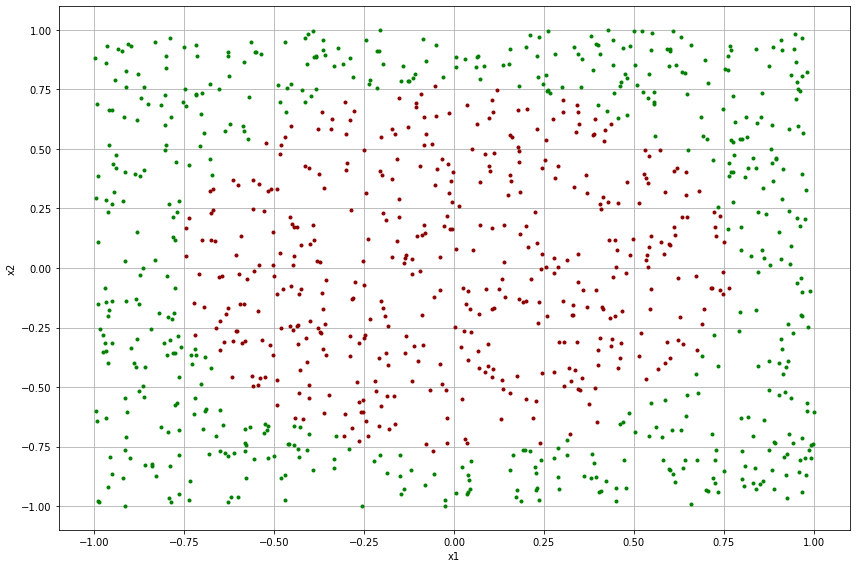

In [13]:
'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!            DO NOT CHANGE                          !!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''
import matplotlib.pyplot as plt
import pylab
import numpy as np
np.random.seed(0) # for reproducability

def dataset_circle(n=1000):
    
    X = np.random.random((n,2)) * 2 - 1
    t = np.array([([1,0] if np.dot(x,x)<0.6 else [0,1]) for x in X])
    
    return X,t


def plot_problem(X, t):

    # define a figure to plot into
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)

    samples1 = [x for x,_t in zip(X,t) if _t[0]]
    samples0 = [x for x,_t in zip(X,t) if _t[1]]
    
    x1,y1 = list(zip(*samples1))
    x0,y0 = list(zip(*samples0))
        
    plt.plot(x1,y1, 'o', color='darkred', markersize=3)
    plt.plot(x0,y0, 'o', color='green', markersize=3)
    plt.grid()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    fig.canvas.draw()


# generate training data and plot it
X,t = dataset_circle()
plot_problem(X, t)

## 5. Run Training
We are now ready to train our network using **backpropagation**. 

### 5a. Mini-Batches
To do so, we define a help method *get_minibatch()*, which samples a random subset (a so-called *mini-batch*) from the training data. Each backpropagation step is performed on such a mini-batch.

In [14]:
# Let's inspect the training data first...
print(X.shape)
print(t.shape)
print(t)

# as training happens on minibatches,
# we write a method that samples a 
# random minibatch...
def minibatch(X, t, batchsize):
    n = len(t)
    idx = np.array(random.sample(range(n), batchsize))
    X_ = torch.tensor(X[idx].astype('float32'))
    t_ = torch.tensor(t[idx].astype('float32'))
    return X_, t_


(1000, 2)
(1000, 2)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


### 5b. Running the actual training
The method *run_training()* which now iteratively picks a mini-batch and performs gradient descent on it.

In [15]:
import random 
random.seed(0) # for reproducability
import torch.optim as optim


def color_plot(mlp):
    ''' help method for visualizing the status of the network'''
    xlim=[-1,1]
    ylim=[-1,1]
    x = np.arange(xlim[0], xlim[1], (xlim[1]-xlim[0])/100.)
    y = np.arange(ylim[0], ylim[1], (ylim[1]-ylim[0])/100.)
    F = np.zeros((len(x), len(y)))
    for i,xval in enumerate(x):
        for j,yval in enumerate(y):
            x_ = torch.tensor([xval,yval], dtype=torch.float).unsqueeze(dim=0)
            y_ = mlp(x_)
            F[i,j] = y_[0,1]
    return F.T


def run_training(mlp, X, t, niters=10000, plot_iters=range(100), learning_rate=0.1):

    color_plots = dict()
    
    # create an optimizer (this object represents
    # the gradient descent - It computes the gradient
    # and applies the changes).
    optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

    for i in range(niters):

        x_,t_ = minibatch(X,t,100)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_ = mlp(x_)
        loss = loss_function(y_, t_)
        loss.backward()
        optimizer.step()

        if i in plot_iters:
            color_plots[i] = color_plot(mlp)
            print('Iteration %d : Loss=%.2f, mean=%.2f, std=%.2f' %(i,loss.item(),
                                                                    np.mean(color_plots[i]),
                                                                    np.std(color_plots[i])))

    print('Finished Training')
    
    return color_plots


# define the network+data, and train.
mlp = MLP(H=40)
print()
X,t = dataset_circle()
color_plots = run_training(mlp, X, t, niters=200, learning_rate=0.05, 
                           plot_iters=list(range(10))+list(range(10,1000,10)))


Iteration 0 : Loss=0.50, mean=1.00, std=0.00
Iteration 1 : Loss=0.50, mean=0.98, std=0.02
Iteration 2 : Loss=0.49, mean=0.92, std=0.09
Iteration 3 : Loss=0.48, mean=0.82, std=0.16
Iteration 4 : Loss=0.47, mean=0.64, std=0.21
Iteration 5 : Loss=0.43, mean=0.39, std=0.20
Iteration 6 : Loss=0.39, mean=0.28, std=0.14
Iteration 7 : Loss=0.36, mean=0.28, std=0.10
Iteration 8 : Loss=0.31, mean=0.37, std=0.08
Iteration 9 : Loss=0.28, mean=0.56, std=0.08
Iteration 10 : Loss=0.28, mean=0.68, std=0.09
Iteration 20 : Loss=0.25, mean=0.59, std=0.08
Iteration 30 : Loss=0.23, mean=0.55, std=0.09
Iteration 40 : Loss=0.18, mean=0.48, std=0.12
Iteration 50 : Loss=0.17, mean=0.48, std=0.16
Iteration 60 : Loss=0.14, mean=0.49, std=0.19
Iteration 70 : Loss=0.12, mean=0.52, std=0.23
Iteration 80 : Loss=0.14, mean=0.52, std=0.26
Iteration 90 : Loss=0.12, mean=0.49, std=0.28
Iteration 100 : Loss=0.09, mean=0.53, std=0.30
Iteration 110 : Loss=0.08, mean=0.53, std=0.32
Iteration 120 : Loss=0.07, mean=0.55, std

## 6. Visualizing a Training

The next code generates a dynamic plot to illustrate the progress of training. 

*Remark: Generating the plot can take a minute (depending on how many iterations you visualize...).*

In [16]:
'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!            DO NOT CHANGE                          !!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# initialize plot
fig, ax = plt.subplots(figsize=(16,12))
ln = None

def init():
    # setting up the initial plot
    global ln, color_plots, X, t
    # show colorplot
    ln = ax.imshow(color_plots[0], interpolation='bicubic', origin='lower',
                   cmap=pylab.get_cmap("RdYlGn"), 
                   extent = [-1,1,-1,1], vmin=0., vmax=1.,
                   animated=True )
    
    # plot samples
    samples1 = [x for x,_t in zip(X,t) if _t[0]]
    samples0 = [x for x,_t in zip(X,t) if _t[1]]
    x1,y1 = list(zip(*samples1))
    x0,y0 = list(zip(*samples0))
    plt.plot(x1,y1, 'o', color='darkred', markersize=3)
    plt.plot(x0,y0, 'o', color='green', markersize=3)
    plt.close()
    
    return ln,


def update(iteration):
    # refresh the plot to show a certain training iteration.
    global ln, color_plots
    ln.set_data(color_plots[iteration])
    return ln,


# creating an animated plot and displaying it...
ani = FuncAnimation(fig, update, frames=sorted(color_plots.keys()),
                    init_func=init, blit=True)

HTML(ani.to_jshtml())

## 7. Testing the Network

<img src="https://img.huffingtonpost.com/asset/5b9ec67b2400005100541e8d.jpeg?ops=scalefit_720_noupscale&format=webp" width="100%">


Finally... To test the model, we can simply run its forward pass after training. Two things are worth mentioning:
* PyTorch Modules do not accept single samples as input - they only work on **mini-batches** of multiple samples. Therefore, if we want to feed the network a single 2-dimensional vector, we must convert it into a 1x2 matrix.
* By calling testing with **torch.no_grad()**, PyTorch avoids gradient computation and can work more efficiently.

In [17]:
# a test sample
x = torch.tensor([0.5,0.5])

with torch.no_grad():
    x.unsqueeze_(0)         # This adds a new zero'th dimension, turning x from a (2) vector into a (1x2) matrix.
                            # Note that unsqueeze_(),add_(),... operate in-place, while unsqueeze(),add(),... do not.
    result = mlp(x)
    print(result.numpy())   # The network gives a higher probability for class 0, not class 1.

[[0.69722664 0.27517274]]
